<a href="https://colab.research.google.com/github/ZLarson212/DeepLearningPointCloud/blob/Clustering/FullClusteringNotebookZack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A quick guide to loading and visulizing pointcloud data

First, if you are on Google Colab download the sample data from Canvas and put it in your Google drive, somewhere accessible. Then run the code below to connect your Google drive to Colab. You'll need to open the link, give Colab access to your files, and then copy the authorization code in. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


The drive should now be mounted at `/content/gdrive/My Drive/`. For example, I uploaded the sample data to a folder under 

`Spring 2021/XN Project/Cloud Sample Data/`

so I will set the root directory to

`root = '/content/gdrive/My Drive/Spring 2021/XN Project/Cloud Sample Data/'`

Now, we need to install `open3d` which is the library we will used to load the .pcd files in. For more about `open3d` see the documentation here: http://www.open3d.org/docs/release/


In [2]:
pip install open3d -q

     |████████████████████████████████| 188.4MB 76kB/s 


In [3]:
import numpy as np 
import open3d as o3d

root = '/content/gdrive/My Drive/DeepLearningPointCloud/Cloud Sample Data/Cloud Sample Data/'

pcd_face = o3d.io.read_point_cloud(root + "1608332814003/face_segment.pcd")
pcd_all = o3d.io.read_point_cloud(root + "1608332814003/PointCloudCapture.pcd")
face_seg = np.asarray(pcd_face.points)  
all_data = np.asarray(pcd_all.points)  
print ("Face Segment Shape: ", face_seg.shape)  
print ("Total Data Shape: ", all_data.shape)  

Face Segment Shape:  (39877, 3)
Total Data Shape:  (235551, 3)


In [4]:
all_data

array([[ 0.        ,  0.        ,  0.        ],
       [-0.08628701, -0.05002827,  0.50092471],
       [-0.08647542, -0.04946395,  0.50082242],
       ...,
       [-0.00431987, -0.11621206,  1.1451006 ],
       [-0.00432102, -0.11561237,  1.1454179 ],
       [-0.00463493, -0.11496739,  1.1452868 ]])

The data here is a large array of 3D points, one array corresponding to points in the face, the other corresponding to *all* points including those in the face. 

You'll notice that the number of points is quite large, in the hundreds of thousands. This is going to hard to view, and may indeed be hard to work with. We can subsample the data to get a more managable set of points that we can work with.

`np.random.choice(number_of_rows, size=size, replace=False)` - Returns a random sample of `size` numbers from 0 to `number_of_row`, we specify `replace=False` soe we do not draw the same datapoint more than one. 

In [5]:
number_of_rows = face_seg.shape[0]
face_size = 1000

random_indices = np.random.choice(number_of_rows, size=face_size, replace=False)
face_samp = face_seg[random_indices,:]


number_of_rows = all_data.shape[0]
all_size = 1000
random_indices = np.random.choice(number_of_rows, size=all_size, replace=False)
all_samp = all_data[random_indices,:]

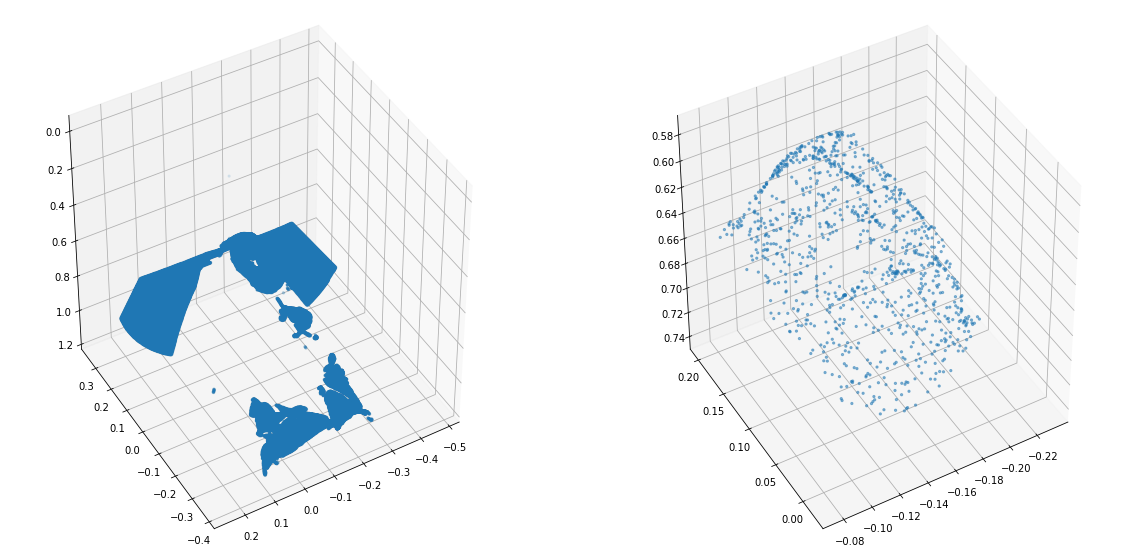

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

# Allows us to plot as a Jupyter Widget for roataion. Can only use on local Jupyter installs due to security issues. 
# %matplotlib notebook    

%matplotlib inline 

fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(121, projection='3d')
ax.scatter(all_data[:,0], all_data[:,1], all_data[:,2], alpha=.1, marker='.')
ax.view_init(-140, 120)       # Rotate the axis for a better view

ax = fig.add_subplot(122, projection='3d')
ax.scatter(face_samp[:,0], face_samp[:,1], face_samp[:,2], alpha=.5, marker='.')
ax.view_init(-140, 120)          # Rotate the axis for a better view
plt.draw()

We can plot these together by using `plt.scatter` coloring functionality. We need to supply it a single arary with all of our data points and a label for each point indicate which color it should be. Here, we'll just use categorical labeling and let `scatter` decide the coloring for us. 

To construct the dataset we'll just concatenate the dataset together. We can then construct the labels by constructing a vector 

[1,1,...,1,2,2,...,2]

Where there are `face_size` 1's and `all_size` 2's.

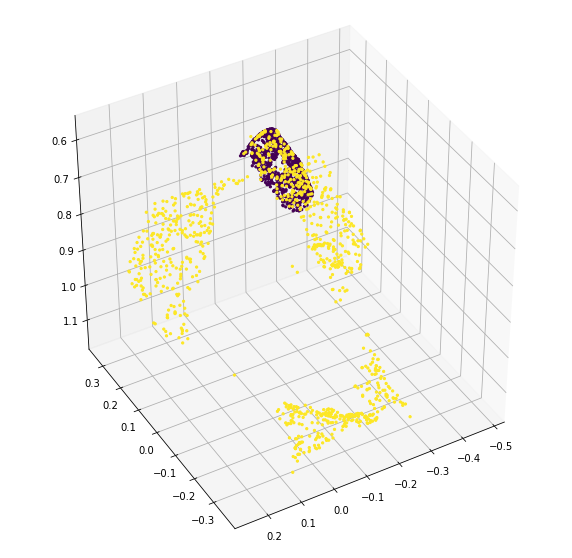

In [7]:
labeled_data = np.concatenate((face_samp,all_samp),axis = 0)
labeled_data.shape
labels = np.concatenate((np.ones(face_size), np.ones(all_size)*2))

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(labeled_data[:,0], labeled_data[:,1], labeled_data[:,2], c = labels, alpha=1, marker='.')
ax.view_init(-140, 120)
plt.show()

Notice that there are some non-segment labels appearing in the face. This is because the all_data array contains all the points include those in the segment. We could construct the label set another way we looping through `all_samp` and decide which point is in the segment. 

In [8]:
face_set = set([tuple(p) for p in face_seg])      ## Convert the list of points into a set of points. Sets can contain tuples but not lists or np.arrays so se must typecast it.
samp_labels = [tuple(p) in face_set for p in all_samp] ## Construct a list using list builder notation: this should be read for p in all_samp, put (tuple(p) in face_set) into the list. 
                                                  ## Note that (tuple(p) in face_set) is a true or false value. 
samp_labels

[False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,

In [9]:
face_set = set([tuple(p) for p in face_seg])
full_labels = [tuple(p) in face_set for p in all_data]
len(full_labels)

235551

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_data, full_labels, test_size=0.2, random_state=42)

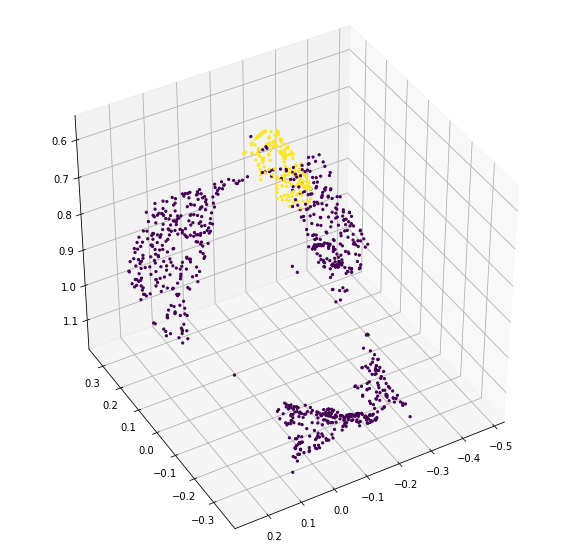

In [11]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(all_samp[:,0], all_samp[:,1], all_samp[:,2], c = samp_labels, alpha=1, marker='.')
ax.view_init(-140, 120)
plt.show()

## Questions:

* How can we determine, just from `all_data` which points lie in the face and which lie outside. Come up with a few different methods.

* For each method you've thought of, determine what it depends on. Does it need a fixed camera angle? Does it need to know the rough area of the face to start? Does it need a single point on the face? Does it depend on other features being "far" away from the face? Under what circumstances could each method ne incorrect?

* Start implementing one of our methods. This is good practice for working with the data, even if you ultimately use something else. 

# Working With Multiple Files

(For a very complete and excellent guide, check out here: https://realpython.com/working-with-files-in-python/)

Now, what if we want to look at more than just the file we've been considering. What if we want to load all of the segments to see what they look like on average?

In the past we've been using text and opening and closing files but here we don't have a file list. Instead, we want to interact with the filesystem directly using the `os` library. `os` will not only let us look inside directories, it will also take care of what is a file, a folder, etc so that we don't have to be so careful about conventions. 

Lets start by looking at all the folders in the `root` directory, that is the directory where the point clouds are stored. It may be helpful to open up the **Files** browser in the tab on the left hand side. 

In [12]:
import os

print("Directories in the root directory:")
os.listdir(root)

Directories in the root directory:


['1608335007385',
 '1608349012229',
 '1608340797805',
 '1608343408802',
 '1608337821692',
 '1608347279931',
 '1608332814003']

Notice that this is a list, so we could access the contents of these directories by looping over this list:

In [13]:
for folder in os.listdir(root):
  print(f"Folder {folder} contains files")
  subdirectory = os.path.join(root, folder)    ## Note: This takes care of '/'  so we don't have to think abou it
  print(os.listdir(subdirectory))

Folder 1608335007385 contains files
['PointCloudCapture.pcd', 'Data.csv', 'face_segment.pcd']
Folder 1608349012229 contains files
['Data.csv', 'PointCloudCapture.pcd', 'face_segment.pcd']
Folder 1608340797805 contains files
['PointCloudCapture.pcd', 'Data.csv', 'face_segment.pcd', 'cropped_face.txt']
Folder 1608343408802 contains files
['Data.csv', 'PointCloudCapture.pcd', 'face_segment.pcd', 'cropped_face.txt']
Folder 1608337821692 contains files
['Data.csv', 'PointCloudCapture.pcd', 'face_segment.pcd', 'cropped_face.txt']
Folder 1608347279931 contains files
['PointCloudCapture.pcd', 'Data.csv', 'face_segment.pcd', 'cropped_face.txt']
Folder 1608332814003 contains files
['Data.csv', 'PointCloudCapture.pcd', 'face_segment.pcd']


Great! SO they all have the `Data.csv` files, the `PointCloudCapture.pcd` file and the `face_segment.pcd` file. If we want to do something like plot all of the face segments we just need to load the face segment from each file: 

In [14]:
pcd_faces = []

for folder in os.listdir(root):
  face_path = os.path.join(root, folder, "face_segment.pcd") 
  pcd_faces += [np.asarray(o3d.io.read_point_cloud(face_path).points)]

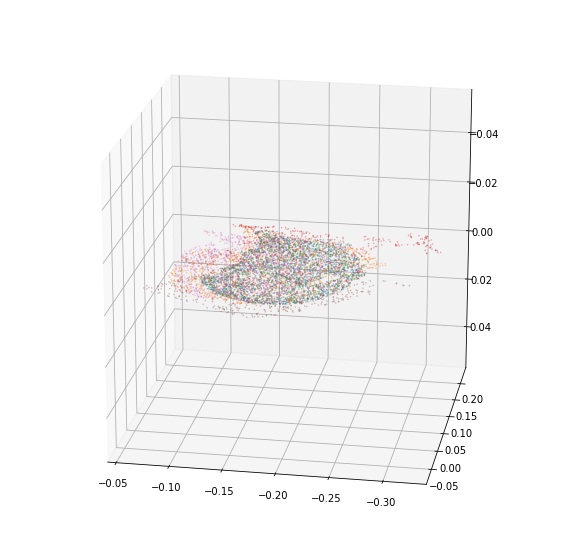

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline 

fig = plt.figure(figsize=[10,10])
ax = plt.subplot(projection='3d')

for face in pcd_faces:
  number_of_rows = face.shape[0]
  face_size = 1000

  random_indices = np.random.choice(number_of_rows, size=face_size, replace=False)
  face_samp = face[random_indices,:]
  plt.scatter(face_samp[:,0], face_samp[:,1], face_samp[:,2], alpha=.5, marker='.')

ax.view_init(-160, 80)          # Rotate the axis for a better view
plt.draw()

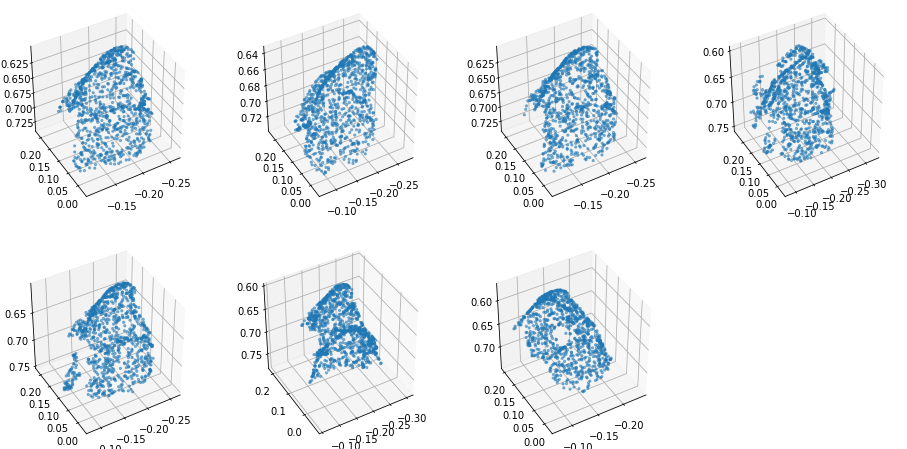

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline 

fig = plt.figure(figsize=[4*4,2*4])

L = len(pcd_faces)
c = int(np.floor(L/4))+1
r = L%4  +1 

for i, face in enumerate(pcd_faces):

  ax = fig.add_subplot(c , r ,i+1, projection='3d')
  number_of_rows = face.shape[0]
  face_size = 1000

  random_indices = np.random.choice(number_of_rows, size=face_size, replace=False)
  face_samp = face[random_indices,:]
  ax.scatter(face_samp[:,0], face_samp[:,1], face_samp[:,2], alpha=.5, marker='.')
  ax.view_init(-140, 120)          # Rotate the axis for a better view

plt.draw()

# Clustering

The most basic clustering form is below, notice how we have to select the number of clusters manually but we get the a firaly good segmentation, provided we allow ourselves to include some off face points. 

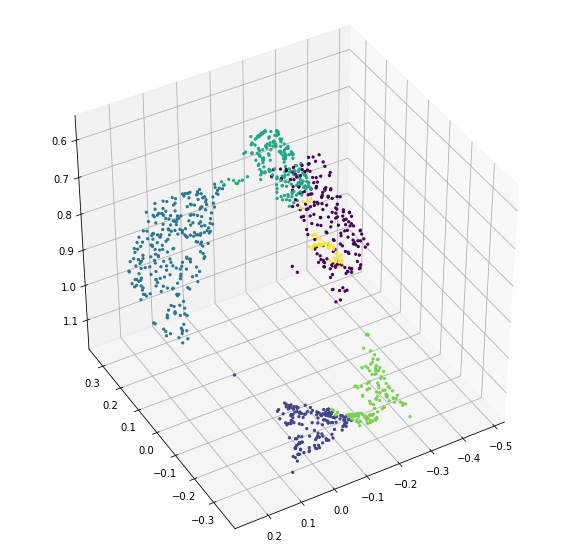

In [17]:
from sklearn.cluster import KMeans

ex_cluster = KMeans(n_clusters = 6)

ex_cluster.fit(all_data)
clust_lables = ex_cluster.predict(all_samp)


fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(all_samp[:,0], all_samp[:,1], all_samp[:,2], c = clust_lables, alpha=1, marker='.')
ax.view_init(-140, 120)
plt.show()

## My Stuff

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors()
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
new_labels = knn.predict(X_test)



Just playing with it a bit here, getting some things to work

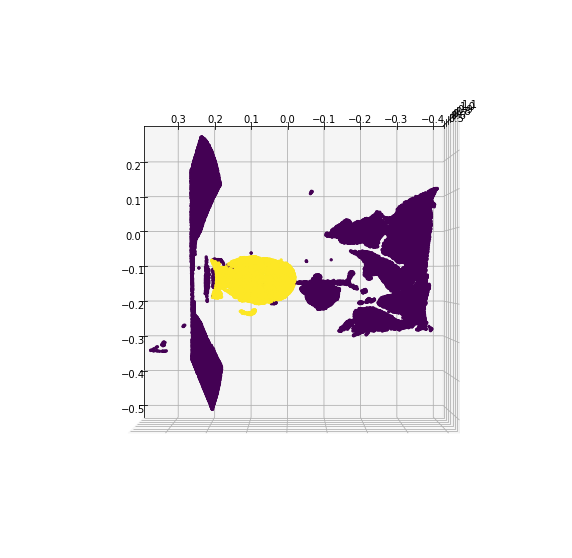

In [19]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c = new_labels, alpha=1, marker='.')
ax.view_init(90, 180)
plt.show()

In [20]:
w = 0
for i in range(len(new_labels)):
  if new_labels[i]==y_test[i]:
    w += 1

score = w/(len(new_labels))
print(score)

0.9999575470696865


In [46]:
pcd_face2 = o3d.io.read_point_cloud(root + "1608335007385/face_segment.pcd")
pcd_all2 = o3d.io.read_point_cloud(root + "1608335007385/PointCloudCapture.pcd")
face_seg2 = np.asarray(pcd_face2.points)  
all_data2 = np.asarray(pcd_all2.points)

face_set2 = set([tuple(p) for p in face_seg2])
full_labels2 = [tuple(p) in face_set2 for p in all_data2]

random_indices2 = np.random.choice(all_data2.shape[0], size=50000, replace=False)
samp_data2 = all_data2[random_indices2,:]

In [47]:
samp_labels2 = [tuple(p) in face_set2 for p in samp_data2]

In [23]:
quail = knn.predict(samp_data2)

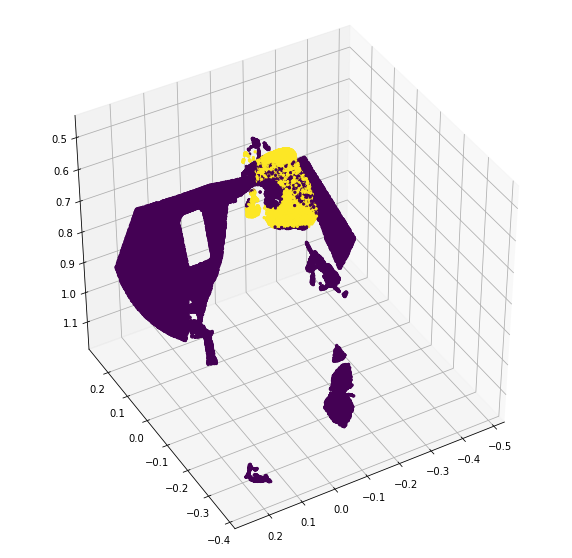

In [24]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(samp_data2[:,0], samp_data2[:,1], samp_data2[:,2], c = quail, alpha=1, marker='.')
ax.view_init(-140, 120)
plt.show()

In [25]:
v = 0
for i in range(len(quail)):
  if quail[i]==samp_labels2[i]:
    v += 1

score2 = v/(len(quail))
print(score2)

0.94658


In [26]:
len(samp_labels2)

50000

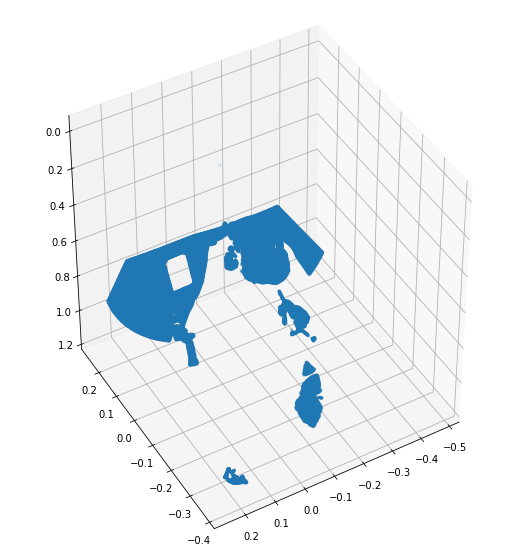

In [27]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(121, projection='3d')
ax.scatter(all_data2[:,0], all_data2[:,1], all_data2[:,2], alpha=.1, marker='.')
ax.view_init(-140, 120)       # Rotate the axis for a better view

# ax = fig.add_subplot(122, projection='3d')
# ax.scatter(face_samp2[:,0], face_samp2[:,1], face_samp2[:,2], alpha=.5, marker='.')
# ax.view_init(-140, 120)          # Rotate the axis for a better view
plt.draw()

## Actual Fit

I tried k nearest neighbors first, I realized this was the wrong way to go about it but it runs and could be useful later

In [28]:
for i,num in enumerate(os.listdir(root)):
  pcd_face2 = o3d.io.read_point_cloud(root + num + "/face_segment.pcd")
  pcd_all2 = o3d.io.read_point_cloud(root + num + "/PointCloudCapture.pcd")
  face_seg2 = np.asarray(pcd_face2.points)  
  all_data2 = np.asarray(pcd_all2.points)

  face_set2 = set([tuple(p) for p in face_seg2])
  full_labels2 = [tuple(p) in face_set2 for p in all_data2]

  random_indices2 = np.random.choice(all_data2.shape[0], size=5000, replace=False)
  samp_data2 = all_data2[random_indices2,:]
  samp_labels2 = [tuple(p) in face_set2 for p in samp_data2]

  quail = knn.predict(samp_data2)

  v = 0
  for i in range(len(quail)):
    if quail[i]==samp_labels2[i]:
      v += 1
  score2 = v/(len(quail))
  print(score2)  

  # ax = fig.add_subplot(c , r ,i+1, projection='3d')
  # print(score2)
  # ax.scatter(samp_data2[:,0], samp_data2[:,1], samp_data2[:,2], c = quail, alpha=.5, marker='.')
  # ax.view_init(-140, 120)


0.9448
0.9698
0.9668
0.9334
0.9698
0.9468
1.0


Starting with DBSCAN, getting it to work on one point cloud before applying it to all of them

In [29]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.005, min_samples=10)

dbs.fit(X_train)

DBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

What is the average distance to closest pixel? Closest 10 pixels? For faces. What are these values for downsamples?

In [30]:
dbs_labels = dbs.fit_predict(X_test)
s = dbs_labels==1
u = 0
for i in range(len(dbs_labels)):
  if y_test[i]==s[i]:
    u += 1

score3 = u/(len(dbs_labels))
print(score3)

0.9976650888327567


In [31]:
len(new_labels)

47111

All clusters found by DBSCAN

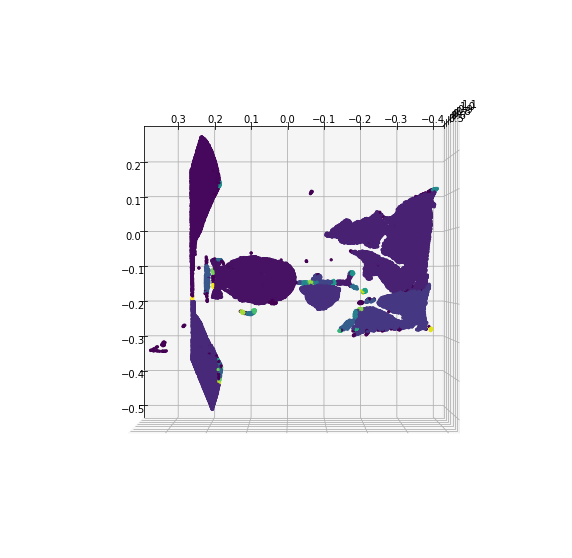

In [32]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c = dbs_labels, alpha=1, marker='.')
ax.view_init(90, 180)
plt.show()

Picking out the first few clusters to see what they look like (high chance of larger clusters being within the first few chosen)

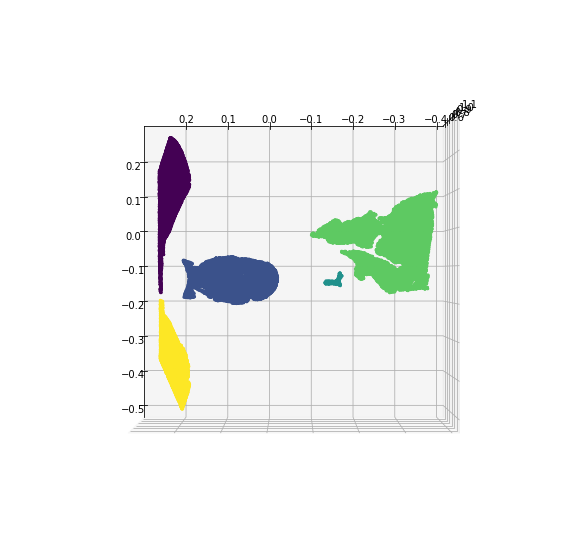

In [33]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
# s = dbs_labels in set([1,2,3,])
s = [I in set([0,1,2,3,4]) for I in dbs_labels]
ax.scatter(X_test[s,0], X_test[s,1], X_test[s,2], c = dbs_labels[s], alpha=1, marker='.')
ax.view_init(90, 180)
plt.show()

Found the face

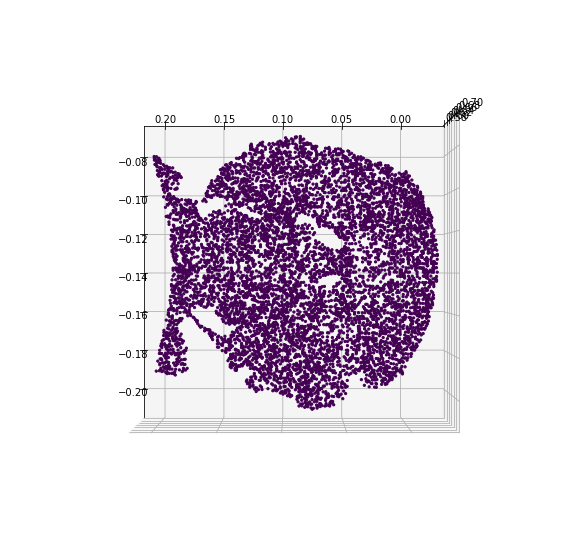

In [34]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
# s = dbs_labels in set([1,2,3,])
# s = [I in set([0,1,2,3,4]) for I in dbs_labels]
s = dbs_labels==1
ax.scatter(X_test[s,0], X_test[s,1], X_test[s,2], c = dbs_labels[s], alpha=1, marker='.')
ax.view_init(90, 180)
plt.show()

In [35]:
np.mean(X_test[:, 2])

0.9048257360584576

Checking if distance from the camera (z) has large influence on the distance between points to see if we need to adjust for that

In [36]:
avg_dist_face = []
red_shift = []

for i,num in enumerate(os.listdir(root)):
  pcd_face2 = o3d.io.read_point_cloud(root + num + "/face_segment.pcd")
  pcd_all2 = o3d.io.read_point_cloud(root + num + "/PointCloudCapture.pcd")
  face_seg2 = np.asarray(pcd_face2.points)  
  all_data2 = np.asarray(pcd_all2.points)

  d = np.mean(o3d.geometry.PointCloud.compute_nearest_neighbor_distance(pcd_face2))
  z = np.mean(all_data2[:,2])
  avg_dist_face.append(d)
  red_shift.append(z)


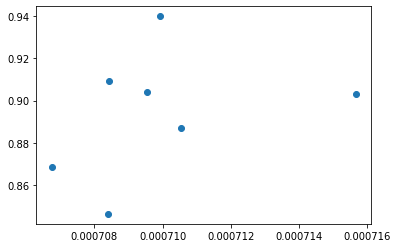

In [37]:
plt.scatter(avg_dist_face, red_shift)

Figuring out how to implement the 2D shape of the cluster to identify the face

In [38]:
# len(X_test[s,:])
# len(X_test[y_test, :])
length = X_test[s,0][np.argmax(X_test[s,0])] - X_test[s,0][np.argmin(X_test[s,0])]
width = X_test[s,1][np.argmax(X_test[s,1])] - X_test[s,1][np.argmin(X_test[s,1])]
height = X_test[s,2][np.argmax(X_test[s,2])] - X_test[s,2][np.argmin(X_test[s,2])]

print(length)
print(width)
print(height)

0.131688357
0.221271079
0.12007701999999998


## Fit 2

Trying these things on a second point cloud

In [48]:
dbs_labels2 = dbs.fit_predict(samp_data2)

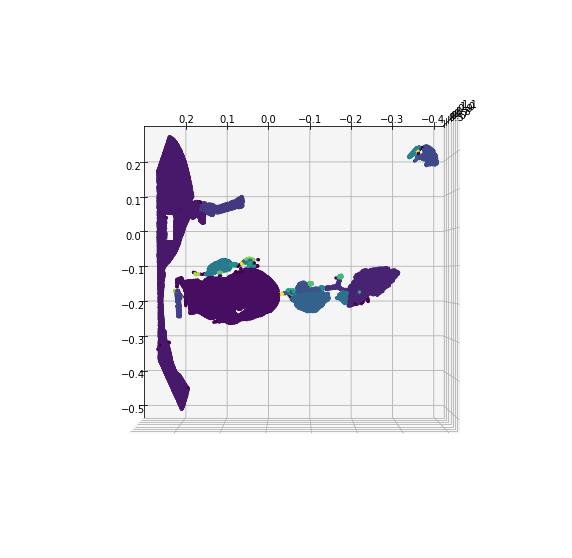

In [49]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(samp_data2[:,0], samp_data2[:,1], samp_data2[:,2], c = dbs_labels2, alpha=1, marker='.')
ax.view_init(90, 180)
plt.show()

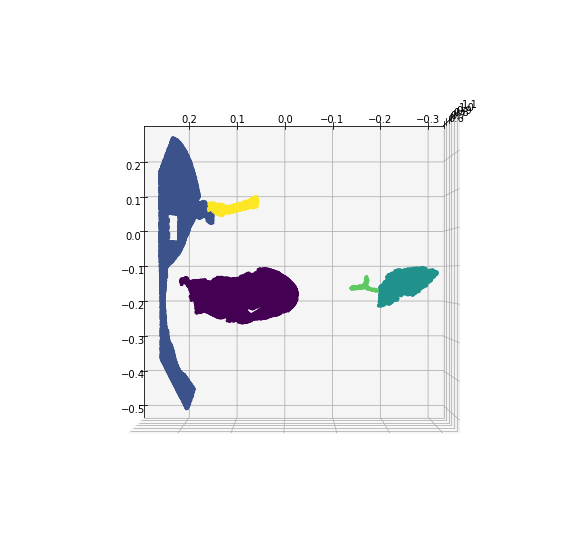

In [50]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')
# s = dbs_labels in set([1,2,3,])
s = [I in set([0,1,2,3,4]) for I in dbs_labels2]
# s = dbs_labels2 == 1
ax.scatter(samp_data2[s,0], samp_data2[s,1], samp_data2[s,2], c = dbs_labels2[s], alpha=1, marker='.')
ax.view_init(90, 180)
plt.show()

In [51]:
k = dbs_labels2 ==1

u = 0
for i in range(len(k)):
  if samp_labels2[i]==k[i]:
    u += 1

score3 = u/(len(k))
print(score3)

0.15174


In [52]:
length = samp_data2[k,0][np.argmax(samp_data2[k,0])] - samp_data2[s,0][np.argmin(samp_data2[k,0])]
width = samp_data2[k,1][np.argmax(samp_data2[k,1])] - samp_data2[s,1][np.argmin(samp_data2[k,1])]

print(length)
print(width)

0.07891721000000002
0.49371524


## Function Time

Putting the steps into a function that returns the cluster of face points

In [61]:
def clusterer(data):
  # good_labels = []
  #choose dbscan params and l/w params

  e = 0.005
  ms = 10
  
  dbs = DBSCAN(eps=e, min_samples=ms)

  min_length = 0.07
  max_length = 0.22
  min_width = 0.15
  max_width = 0.4

  dbs_labels = dbs.fit_predict(data)

  for i in sorted(set(dbs_labels)):
    s = dbs_labels==i
    length = data[s,0][np.argmax(data[s,0])] - data[s,0][np.argmin(data[s,0])]
    width = data[s,1][np.argmax(data[s,1])] - data[s,1][np.argmin(data[s,1])]
    if min_length < length < max_length and min_width < width < max_width:
      # good_labels.append(i)
      return (data[s,:],s)


Checking to see if the clusters are accurate

In [71]:
for i,num in enumerate(os.listdir(root)):
  pcd_face2 = o3d.io.read_point_cloud(root + num + "/face_segment.pcd")
  pcd_all2 = o3d.io.read_point_cloud(root + num + "/PointCloudCapture.pcd")
  face_seg2 = np.asarray(pcd_face2.points)  
  all_data2 = np.asarray(pcd_all2.points)

  face_set2 = set([tuple(p) for p in face_seg2])
  full_labels2 = [tuple(p) in face_set2 for p in all_data2]

  random_indices2 = np.random.choice(all_data2.shape[0], size=50000, replace=False)
  samp_data2 = all_data2[random_indices2,:]
  samp_labels2 = [tuple(p) in face_set2 for p in samp_data2]

  p = clusterer(samp_data2)

  # print(len(p[0]))

  u = 0
  for j in range(len(p[0])):
    if p[1][j]==samp_labels2[j]:
      u += 1

  score = u/(len(p[0]))
  print(score)
  

0.999664288711708
0.999177406087195
0.9974082073434125
0.9795794230100799
0.9920967548796551
0.6747186384847653
0.9978354978354979


## End of My Stuff

I used the notebook given to us by the professor to have some of the code readily accessible

## Some Graph Theory

### Constructing Graphs

If we want to construct a graph we can use two methods: direct computation of the distances in a distance matrix, followed by removing all points outside of some threshold distance, or we can use prebuilt sparse methods like the radail basis kernel transformer

https://scikit-learn.org/stable/modules/neighbors.html#neighbors-transformer



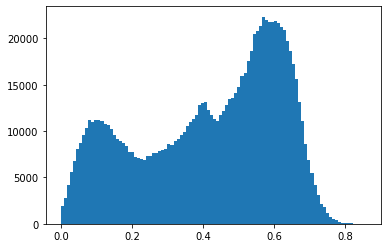

In [ ]:
from sklearn.metrics import pairwise_distances

### Lets construct the distance matrix and compare directly:

dist = pairwise_distances(all_samp)

plt.hist(dist.reshape(-1),bins=100)
plt.show()

It looks like there is a rough peak in how far apart "typical" elements are around .1. We actaully want to take it be far less than this, individual points should be pretty close to eachother as long as they're within the same cluster. Lets take it to be .05

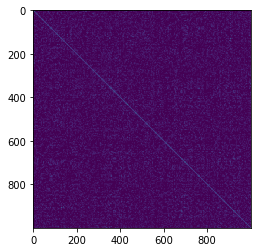

In [ ]:
dist_sparse = dist.copy()
dist_sparse[dist>.05] = 1
dist_sparse[dist<=.05] = 0
dist_sparse = 1-dist_sparse

plt.imshow(dist_sparse)

In [ ]:
import scipy.linalg as la

diag = np.sum(dist_sparse,axis=0)
laplace = dist_sparse - np.diag(diag)

evals, evecs = np.linalg.eig(laplace)
idx = evals.argsort()   
evals = evals[idx] 
evecs = evecs[:,idx]


In [ ]:
print("Predicted number of Conected Components:", sum(np.absolute(evals)<.00000001))

Predicted number of Conected Components: 7


Using specteral clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

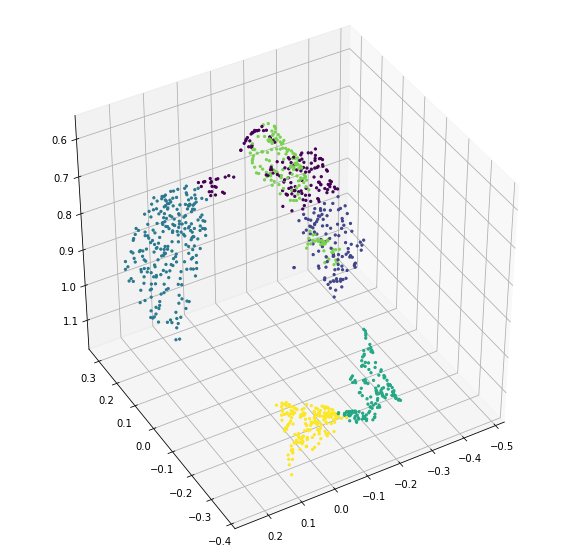

In [ ]:
from sklearn.cluster import SpectralClustering

ex_cluster = SpectralClustering(n_clusters = 6)

ex_cluster.fit(all_samp)
clust_lables = ex_cluster.labels_


fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

ax.scatter(all_samp[:,0], all_samp[:,1], all_samp[:,2], c = clust_lables, alpha=1, marker='.')
ax.view_init(-140, 120)
plt.show()

# 2D Projections

The simplest 2D projection is just to forget the z-coordinate. This is a little "incorrect" because we're not taking into account the fact that our light collector is small and so really we should trace back the rays, but it gives a quick way to reduce the image down to a 3d plane. In addition, we can then color by the z-coordiante, or alternativly use z as the intensity. 

In [ ]:
twod_points = np.array([p[0:2] for p in all_samp])
twod_z = np.array([p[2] for p in all_samp])

twod_points

array([[-0.26632336, -0.15244719],
       [-0.1897141 ,  0.08536769],
       [-0.02653642, -0.23039137],
       ...,
       [-0.01052909, -0.13596144],
       [-0.41143316,  0.17868048],
       [-0.16409276,  0.17112531]])

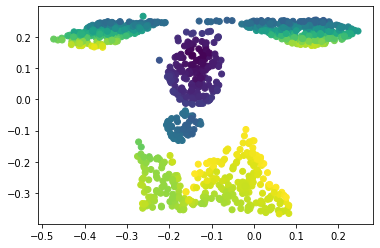

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(twod_points[:,0], twod_points[:,1],c=twod_z)

Try to construct the image using rays. Remmeber that the camera is at (0,0,0).  

# Notes on Point Ordering

* It appears that the points are roughly ordered, at least initially by the third coorindate. We should check on the technology and see if there's anything else that can bee gleaned about the storrage. 
* Might be worth looking into for voxelization: https://pvgeo.org/examples/filters-general/voxelize-points.html

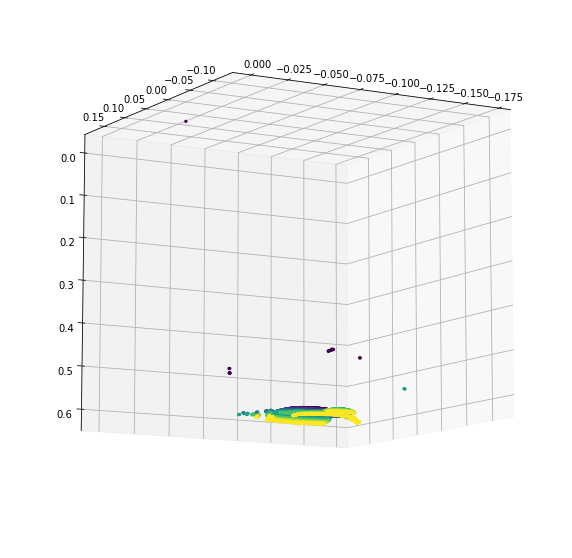

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection='3d')

N = 8000

labs = np.concatenate([np.ones(1000),np.ones(1000)*2,np.ones(1000)*3,np.ones(1000)*4,np.ones(1000)*5,np.ones(1000)*6,np.ones(1000)*7,np.ones(1000)*8])

ax.scatter(all_data[:N,0], all_data[:N,1], all_data[:N,2], c = labs, alpha=1, marker='.')
ax.view_init(-190, 120)
plt.show()

# Density and 3d Regions

Lets see if we can chop the data up into voxels:

In [ ]:
max_coords = np.max(all_data, axis=0)
min_coords = np.min(all_data, axis=0)
span = max_coords - min_coords
print("Span:" , span)
step = .1

print(min_coords,max_coords)
print('Span:',span)
print('Voxels:',np.ceil(span/step), "Total Number:", np.prod(np.ceil(span/step)))

Span: [0.73075718 0.71827391 1.1454179 ]
[-0.48117486 -0.37693954  0.        ] [0.24958232 0.34133437 1.1454179 ]
Span: [0.73075718 0.71827391 1.1454179 ]
Voxels: [ 8.  8. 12.] Total Number: 768.0


For creating an array of lists for appending, see https://stackoverflow.com/questions/33983053/how-to-create-a-numpy-array-of-lists/33987165 and the links therein.

Get the dimensions of the voxel array:

In [ ]:
v_shape = tuple(np.ceil(span/step).astype('int16'))

voxel_array = np.frompyfunc(list, 0, 1)(np.empty((v_shape), dtype=object))      # Array actaully holding our voxels it will be an array of lists since we may have different numbers of voxels per segemnet
voxel_array.shape

(8, 8, 12)

Store the points in the voxels. Note the following code runs pretty fast!

In [ ]:
face_set = set([tuple(p) for p in face_seg])      ## Convert the list of points into a set of points. Sets can contain tuples but not lists or np.arrays so se must typecast it.
samp_labels = [tuple(p) in face_set for p in all_data] ## Construct a list using list builder notation: this should be read for p in all_samp, put (tuple(p) in face_set) into the list. 
                                                  ## Note that (tuple(p) in face_set) is a true or false value. 

The code below loops through the pixels and assigns determins which voxel it should be in by checking the bottom left corner

`v = tuple(np.floor((p - min_coords)/step).astype('int16'))`

It then assigns the point to the voxel

`voxel_array[v].append(p)`

appends the voxel to voxel_labels.append(v) so we can construct an index of which points positionally ended up in which voxel, adds a label to the our voxel_y list, and finally update the number of points in the voxel for record keeping. 

In [ ]:
voxel_labels = []                # Point to Voxel index
voxel_y = np.zeros(v_shape)      # In segment or out segment values for each point in the voxel.
voxel_n = np.zeros(v_shape)      # Number of points per voxel

for i,p in enumerate(all_data):
  v = tuple(np.floor((p - min_coords)/step).astype('int16'))
  voxel_array[v].append(p)
  voxel_labels.append(v)
  voxel_y[v] += samp_labels[i]
  voxel_n[v] += 1

In [ ]:
voxel_array[3,1,10]

In [ ]:
print("These voxels have lables:")

v_list = list(set(voxel_labels))
v_list

Argmax code: https://stackoverflow.com/questions/30589211/numpy-argmax-over-multiple-axes-without-loop

In [ ]:
def argmax_lastNaxes(A, N):
    s = A.shape
    new_shp = s[:-N] + (np.prod(s[-N:]),)
    max_idx = A.reshape(new_shp).argmax(-1)
    return np.unravel_index(max_idx, s[-N:])

print("Max number of pixels in Voxel:", voxel_n.max())
print("Mean number of pixels in Voxel:", voxel_n.mean())
print("Number of Voxels with pixels:", len(v_list))
print("Argmax number of pixels in Voxel:", argmax_lastNaxes(voxel_n,0))

Max number of pixels in Voxel: 15010.0
Mean number of pixels in Voxel: 306.70703125
Number of Voxels with pixels: 84
Argmax number of pixels in Voxel: (3, 4, 6)


## Construct Voxel Density

In [ ]:
def construct_density(vox_points, ticks = (30,30,30)):
  vox_points = np.array(vox_points)
  vox_min = np.min(vox_points, axis=0)   # Min coordinates, not this is a tuple with 3 elements.
  vox_max = np.max(vox_points, axis=0)   # Max coordinates, not this is a tuple with 3 elements.
  vox_span = vox_max - vox_min           # Spand across each axis. 
  vox_step = vox_span/ticks              # Steps across each axis. 
  vox_den = np.zeros(ticks)              # The Density matrix, starts with 0's everywhere. 

  for p in vox_points:
    v = tuple(np.floor((p - vox_min)/(vox_step*1.0001)).astype('int16'))  # Determine which voxel in the voxel the pixel contributes to 
    vox_den[v] += 1  # Add it in.
  
  return(vox_den)

ex_density = construct_density(voxel_array[v_list[7]])

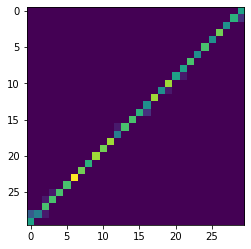

In [ ]:


plt.imshow(ex_density[8,:,:])

In [ ]:
sum(ex_density)

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   26.,
        1094.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    6., 1186.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,   18., 1260.,   18.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,   26., 1344.,   12.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,   24., 1446.,   10.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,   22., 1540.,    4.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,   22., 1654.,    6.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,   14., 1734.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [  50., 1794.,   10.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [1806.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]])

In [ ]:
vox_min = np.min(np.array(voxel_array[v_list[1]]), axis=0)
vox_max = np.max(np.array(voxel_array[v_list[1]]), axis=0)

print(vox_min)

for p in voxel_array[v_list[1]]:
  print(p)

  break

[-0.26368806  0.26401576  0.90026772]
[-0.26127493  0.26401576  0.90026772]


Define the Histogram of Orientated Gradients function for 3d. In this case I consttruct gradients using 3D Sodel operators. Then compute the partial derivatives and the graident vector, and compute the the anggualr information for the partial derivatives.

In [ ]:
import itertools
from scipy import ndimage

def hog(image, orientations=(4,4), pixels_per_cell=(2, 2, 2)):
  p = pixels_per_cell
  o = orientations
  ## Define Sobel Operators
  ## Building Blocks:
  h = np.array([1,0,-1])
  g = np.array([1,2,1])
  dx = np.kron(np.kron(h.reshape(1,-1,1),g.reshape(1,1,-1)),g.reshape(-1,1,1))
  dy = np.kron(np.kron(h.reshape(1,1,-1),g.reshape(-1,1,1)),g.reshape(1,-1,1))
  dz = np.kron(np.kron(h.reshape(-1,1,1),g.reshape(1,-1,1)),g.reshape(1,1,-1))

  ## Compute Partial Derivatives image
  x_im = ndimage.convolve(ex_density, dx, mode='constant', cval=0.0)
  y_im = ndimage.convolve(ex_density, dy, mode='constant', cval=0.0)
  z_im = ndimage.convolve(ex_density, dz, mode='constant', cval=0.0)

  ## Compute angular information for partial dervaitives
  r = np.sqrt(x_im**2 + y_im**2 + z_im**2) # Gradient Magnitude
  theta = np.arccos(z_im/(r+.0001)) # Spherical Theta, range 0 to pi
  phi = np.arctan(y_im/(x_im+.0001)) # Spherical Phi, range 0 to 2pi


  ## Construct the number of steps accross the image
  ar_shape = tuple(map(lambda i, j: i - j, image.shape, p))

  # Add 1 to the number of orientations so we don't ahve to deal with specail cases in modulo.
  o_plus = tuple(np.array(orientations) + 1)
  hog = np.zeros(ar_shape + orientations)
#  print(hog.shape)
#  print(image.shape)

  #Compute the 3d historgram of oriented graidents
  for i in range(ar_shape[0]):
    for j in range(ar_shape[1]):
      for k in range(ar_shape[2]):
        H = np.zeros(orientations)
        r_block = r[i:i+p[0], j:j+p[1], k:k+p[2]]
        theta_block = theta[i:i+p[0], j:j+p[1], k:k+p[2]]
        phi_block = phi[i:i+p[0], j:j+p[1], k:k+p[2]]

        th_n, th_f = divmod((o[0]*theta_block).reshape(-1)/np.pi, 1)
        phi_n,  phi_f = divmod((o[1]*phi_block).reshape(-1)/(2*np.pi), 1)
        grad = r_block.reshape(-1)

        ## Fill in the histogram. Note that I assume there is one extra box for ease of indexing, then add it on to the 0 box at the end. 
        for s in range(len(phi_n)):
          H[int(th_n[s]) % o[0],int(phi_n[s]) % o[1]] = ((1-th_f[s]) +  (1-phi_f[s]))*grad[s]
          H[(int(th_n[s]) +1) % o[0],(int(phi_n[s]) +1) % o[1]] = ((th_f[s]) +  (phi_f[s]))*grad[s]
      

        hog[i,j,k] = H

  return hog

H = hog(ex_density)
H

Great! Now for each voxel that contains data, lets construct the density, compute the HOG of the density, and make a Y label by taking the average number of labels in that voxel. 

In [ ]:
X = []
Y = []

for i,v in enumerate(v_list):
  ex_density = construct_density(voxel_array[v])
  X += [hog(ex_density).reshape(-1)]
  Y += [voxel_y[v]/voxel_n[v]]
   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
X_a = np.array(X)
print(X_a.shape)

(84, 8192)


Great! Now lets do some machine learning

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, np.round(y_train))
print(clf.score(X_train, np.round(y_train)))
print(clf.score(X_test, np.round(y_test)))

0.875
0.8928571428571429


In [ ]:
1- np.mean(np.round(y_train))

0.8392857142857143

Construct 3d Sobel Operators:
https://en.wikipedia.org/wiki/Sobel_operator

In [ ]:
dx = np.kron(np.kron(h.reshape(1,-1,1),g.reshape(1,1,-1)),g.reshape(-1,1,1))
dy = np.kron(np.kron(h.reshape(1,1,-1),g.reshape(-1,1,1)),g.reshape(1,-1,1))
dz = np.kron(np.kron(h.reshape(-1,1,1),g.reshape(1,-1,1)),g.reshape(1,1,-1))

In [ ]:
from scipy import ndimage
ndimage.convolve(ex_density, dx, mode='constant', cval=0.0)

### Some exparements with different hyper parameters. 

So the intial test did not do well, lets see if we can get a little more training data. 



In [ ]:
def argmax_lastNaxes(A, N):
    s = A.shape
    new_shp = s[:-N] + (np.prod(s[-N:]),)
    max_idx = A.reshape(new_shp).argmax(-1)
    return np.unravel_index(max_idx, s[-N:])

def construct_voxel_list(data, seg, step = .1):
  max_coords = np.max(data, axis=0)
  min_coords = np.min(data, axis=0)
  span = max_coords - min_coords

  print(min_coords,max_coords)
  print('Span:',span)
  print('Voxels:',np.ceil(span/step), "Total Number:", np.prod(np.ceil(span/step)))

  v_shape = tuple(np.ceil(span/step).astype('int16'))

  voxel_array = np.frompyfunc(list, 0, 1)(np.empty((v_shape), dtype=object))

  face_set = set([tuple(p) for p in seg])      ## Convert the list of points into a set of points. Sets can contain tuples but not lists or np.arrays so se must typecast it.
  samp_labels = [tuple(p) in face_set for p in data] ## Construct a list using list builder notation: this should be read for p in all_samp, put (tuple(p) in face_set) into the list. 
                                                  ## Note that (tuple(p) in face_set) is a true or false value. 

  voxel_labels = []
  voxel_y = np.zeros(v_shape)
  voxel_n = np.zeros(v_shape)

  for i,p in enumerate(all_data):
    v = tuple(np.floor((p - min_coords)/step).astype('int16'))
    voxel_array[v].append(p)
    voxel_labels.append(v)
    voxel_y[v] += samp_labels[i]
    voxel_n[v] += 1

  print("Max number of pixels in Voxel:", voxel_n.max())
  print("Mean number of pixels in Voxel:", voxel_n.mean())
  print("Argmax number of pixels in Voxel:", argmax_lastNaxes(voxel_n,0))
  print("Number of voxels with segments:", sum(sum(sum(voxel_y>0))))
  print("Number of voxels:", len(set(voxel_labels)))

  return(voxel_array, voxel_labels, voxel_y, voxel_n)

voxel_array, voxel_labels, voxel_y, voxel_n = construct_voxel_list(all_data,face_seg,.01)

[-0.48117486 -0.37693954  0.        ] [0.24958232 0.34133437 1.1454179 ]
Span: [0.73075718 0.71827391 1.1454179 ]
Voxels: [ 74.  72. 115.] Total Number: 612720.0
Max number of pixels in Voxel: 185.0
Mean number of pixels in Voxel: 0.3844349784567176
Argmax number of pixels in Voxel: (35, 50, 58)
Number of voxels with segments: 586
Number of voxels: 3767


In [ ]:
X = []
Y = []

v_list = list(set(voxel_labels))

for i,v in enumerate(v_list):
  ex_density = construct_density(voxel_array[v])
  X += [hog(ex_density).reshape(-1)]
  Y += [voxel_y[v]/voxel_n[v]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
X_a = np.array(X)
print(X_a.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_a, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, np.round(y_train))
print(clf.score(X_train, np.round(y_train)))
print(clf.score(X_test, np.round(y_test)))

In [ ]:
print(1-np.mean(y_test))

Time for some exparaments

In [ ]:
from tqdm import tqdm
voxel_array, voxel_labels, voxel_y, voxel_n = construct_voxel_list(all_data,face_seg,.03)

X = []
Y = []

v_list = list(set(voxel_labels))
N = len(v_list)

for v in tqdm(v_list, position=0, leave=True):
  ex_density = construct_density(voxel_array[v],ticks = (20,20,20))
  X += [hog(ex_density, pixels_per_cell=(5,5,5)).reshape(-1)]
  Y += [voxel_y[v]/voxel_n[v]]

In [ ]:
X_a = np.array(X)
print(X_a.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_a, Y, test_size=0.33, random_state=42)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, np.round(y_train))
print(clf.score(X_train, np.round(y_train)))
print(clf.score(X_test, np.round(y_test)))

print(1-np.mean(np.round(y_train)))
print(1-np.mean(np.round(y_test)))

In [ ]:
# Step .01
# Ticks (15,15,15)
# Pixels Per Cell (5,5,5)

from tqdm import tqdm
voxel_array, voxel_labels, voxel_y, voxel_n = construct_voxel_list(all_data,face_seg,.01)

X = []
Y = []

v_list = list(set(voxel_labels))
N = len(v_list)

for v in tqdm(v_list, position=0, leave=True):
  ex_density = construct_density(voxel_array[v],ticks = (15,15,15))
  X += [hog(ex_density, pixels_per_cell=(5,5,5)).reshape(-1)]
  Y += [voxel_y[v]/voxel_n[v]]

X_a = np.array(X)
print(X_a.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_a, Y, test_size=0.33, random_state=42)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, np.round(y_train))
print(clf.score(X_train, np.round(y_train)))
print(clf.score(X_test, np.round(y_test)))

print(1-np.mean(np.round(y_train)))
print(1-np.mean(np.round(y_test)))

In [ ]:
# Step .005
# Ticks (10,10,10)
# Pixels Per Cell (5,5,5)

from tqdm import tqdm
voxel_array, voxel_labels, voxel_y, voxel_n = construct_voxel_list(all_data,face_seg,.005)

X = []
Y = []

v_list = list(set(voxel_labels))
N = len(v_list)

for v in tqdm(v_list, position=0, leave=True):
  ex_density = construct_density(voxel_array[v],ticks = (10,10,10))
  X += [hog(ex_density, pixels_per_cell=(5,5,5)).reshape(-1)]
  Y += [voxel_y[v]/voxel_n[v]]

X_a = np.array(X)
print(X_a.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_a, Y, test_size=0.33, random_state=42)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, np.round(y_train))
print(clf.score(X_train, np.round(y_train)))
print(clf.score(X_test, np.round(y_test)))

print(1-np.mean(np.round(y_train)))
print(1-np.mean(np.round(y_test)))

In [ ]:
# Step .005
# Ticks (15,15,15)
# Pixels Per Cell (5,5,5)

from tqdm import tqdm
voxel_array, voxel_labels, voxel_y, voxel_n = construct_voxel_list(all_data,face_seg,.005)

X = []
Y = []

v_list = list(set(voxel_labels))
N = len(v_list)

for v in tqdm(v_list, position=0, leave=True):
  ex_density = construct_density(voxel_array[v],ticks = (15,15,15))
  X += [hog(ex_density, pixels_per_cell=(5,5,5)).reshape(-1)]
  Y += [voxel_y[v]/voxel_n[v]]

X_a = np.array(X)
print(X_a.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_a, Y, test_size=0.33, random_state=42)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, np.round(y_train))
print(clf.score(X_train, np.round(y_train)))
print(clf.score(X_test, np.round(y_test)))

print(1-np.mean(np.round(y_train)))
print(1-np.mean(np.round(y_test)))

Summerizing our results above, what can we do to improve our fit?